In [4]:

import zipfile
import os

# Define the path to the zip file and the extraction directory
zip_file_path = 'Recommnder.zip'
extraction_dir = 'Recommender_data'

# Create the extraction directory if it doesn't exist
os.makedirs(extraction_dir, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

# List the extracted files
extracted_files = os.listdir(extraction_dir)
extracted_files


['Customer.csv', 'prod_cat_info.csv', 'Transactions.csv']

In [5]:
#loading data and inspection :

import pandas as pd

# Load the CSV files into DataFrames
customer_df = pd.read_csv(os.path.join(extraction_dir, 'Customer.csv'))
transactions_df = pd.read_csv(os.path.join(extraction_dir, 'Transactions.csv'))
prod_cat_info_df = pd.read_csv(os.path.join(extraction_dir, 'prod_cat_info.csv'))

# Display the first few rows of each DataFrame
customer_head = customer_df.head()
transactions_head = transactions_df.head()
prod_cat_info_head = prod_cat_info_df.head()

customer_info = customer_df.info()
transactions_info = transactions_df.info()
prod_cat_info_info = prod_cat_info_df.info()

customer_head, transactions_head, prod_cat_info_head, customer_info, transactions_info, prod_cat_info_info



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64

(   customer_Id         DOB Gender  city_code
 0       268408  02-01-1970      M        4.0
 1       269696  07-01-1970      F        8.0
 2       268159  08-01-1970      F        8.0
 3       270181  10-01-1970      F        2.0
 4       268073  11-01-1970      M        1.0,
    transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  Qty  \
 0     80712190438   270351  28-02-2014                 1              1   -5   
 1     29258453508   270384  27-02-2014                 5              3   -5   
 2     51750724947   273420  24-02-2014                 6              5   -2   
 3     93274880719   271509  24-02-2014                11              6   -3   
 4     51750724947   273420  23-02-2014                 6              5   -2   
 
    Rate      Tax  total_amt Store_type  
 0  -772  405.300  -4265.300     e-Shop  
 1 -1497  785.925  -8270.925     e-Shop  
 2  -791  166.110  -1748.110   TeleShop  
 3 -1363  429.345  -4518.345     e-Shop  
 4  -791  166.110  -1748.

In [6]:
# Handling Missing Values and Converting Date Columns:
# Handling missing values
customer_df['Gender'].fillna('Unknown', inplace=True)
customer_df['city_code'].fillna(-1, inplace=True)

# Convert DOB to datetime
customer_df['DOB'] = pd.to_datetime(customer_df['DOB'], format='%d-%m-%Y', errors='coerce')

# Convert tran_date to datetime
transactions_df['tran_date'] = pd.to_datetime(transactions_df['tran_date'], format='%d-%m-%Y', errors='coerce')

# Merge Transactions with Product Category Info
transactions_merged_df = transactions_df.merge(prod_cat_info_df, left_on=['prod_cat_code', 'prod_subcat_code'], right_on=['prod_cat_code', 'prod_sub_cat_code'], how='left')

# Merge with Customer Data
data = transactions_merged_df.merge(customer_df, left_on='cust_id', right_on='customer_Id', how='left')

data_head = data.head()
data_info = data.info()

data_head, data_info



<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_id     23053 non-null  int64         
 1   cust_id            23053 non-null  int64         
 2   tran_date          13929 non-null  datetime64[ns]
 3   prod_subcat_code   23053 non-null  int64         
 4   prod_cat_code      23053 non-null  int64         
 5   Qty                23053 non-null  int64         
 6   Rate               23053 non-null  int64         
 7   Tax                23053 non-null  float64       
 8   total_amt          23053 non-null  float64       
 9   Store_type         23053 non-null  object        
 10  prod_cat           23053 non-null  object        
 11  prod_sub_cat_code  23053 non-null  int64         
 12  prod_subcat        23053 non-null  object        
 13  customer_Id        23053 non-null  int64         
 14  DOB   

(   transaction_id  cust_id  tran_date  prod_subcat_code  prod_cat_code  Qty  \
 0     80712190438   270351 2014-02-28                 1              1   -5   
 1     29258453508   270384 2014-02-27                 5              3   -5   
 2     51750724947   273420 2014-02-24                 6              5   -2   
 3     93274880719   271509 2014-02-24                11              6   -3   
 4     51750724947   273420 2014-02-23                 6              5   -2   
 
    Rate      Tax  total_amt Store_type          prod_cat  prod_sub_cat_code  \
 0  -772  405.300  -4265.300     e-Shop          Clothing                  1   
 1 -1497  785.925  -8270.925     e-Shop       Electronics                  5   
 2  -791  166.110  -1748.110   TeleShop             Books                  6   
 3 -1363  429.345  -4518.345     e-Shop  Home and kitchen                 11   
 4  -791  166.110  -1748.110   TeleShop             Books                  6   
 
   prod_subcat  customer_Id        D

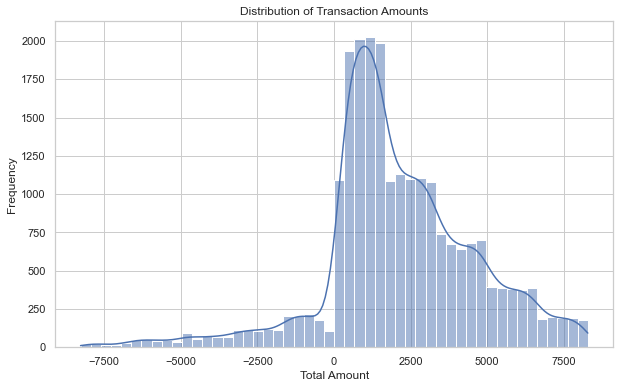

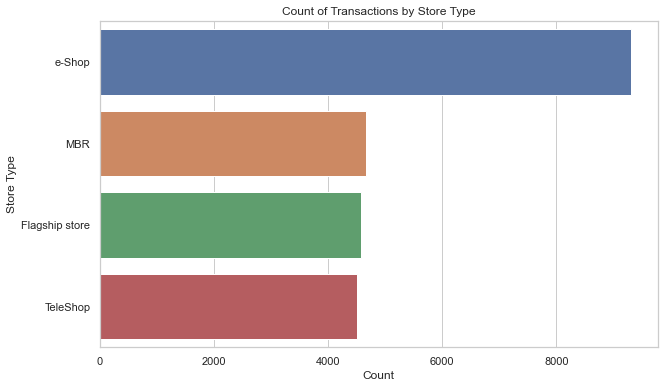

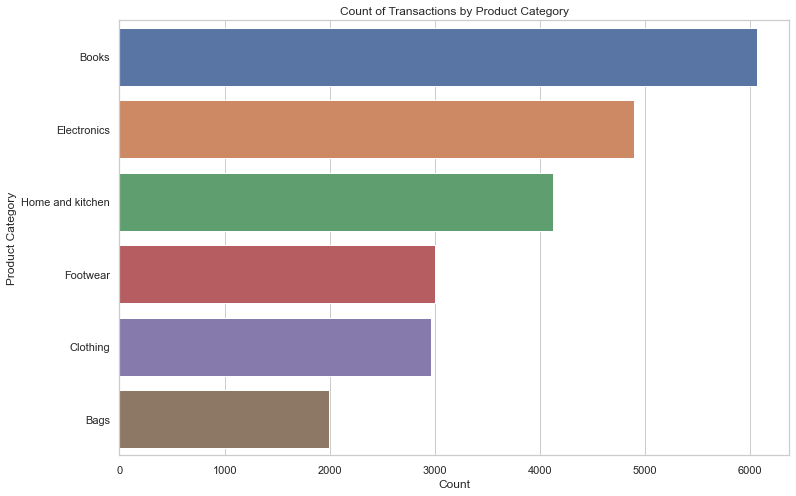

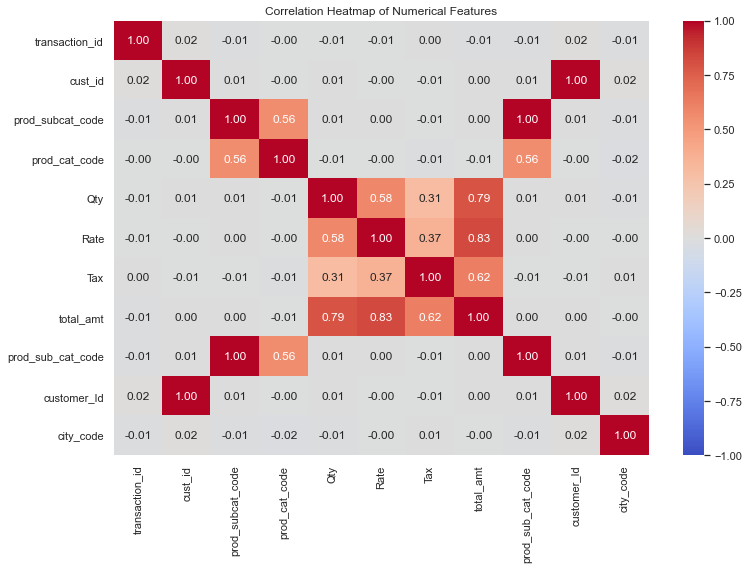

In [7]:
# EDA(Exploratory Data Analysis) :

import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(data['total_amt'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()

# Plot the count of transactions by store type
plt.figure(figsize=(10, 6))
sns.countplot(y='Store_type', data=data, order=data['Store_type'].value_counts().index)
plt.title('Count of Transactions by Store Type')
plt.xlabel('Count')
plt.ylabel('Store Type')
plt.show()

# Plot the count of transactions by product category
plt.figure(figsize=(12, 8))
sns.countplot(y='prod_cat', data=data, order=data['prod_cat'].value_counts().index)
plt.title('Count of Transactions by Product Category')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.show()

# Correlation heatmap of numerical features
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [10]:
# item-Based Collaborative Filtering:
# Create an item-user matrix
item_user_matrix = data.pivot_table(index='prod_subcat_code', columns='cust_id', values='Qty', fill_value=0)

# Fit the model
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(item_user_matrix)

# Function to get recommendations for an item
def get_item_based_recommendations(item_id, n_recommendations=10):
    distances, indices = knn.kneighbors(item_user_matrix.loc[item_id].values.reshape(1, -1), n_neighbors=n_recommendations+1)
    similar_items = indices.flatten()[1:]
    similar_items_distances = distances.flatten()[1:]

    return item_user_matrix.index[similar_items].tolist()

# Example: Get recommendations for a specific item
item_based_recommendations = get_item_based_recommendations(item_id=1)
item_based_recommendations


[4, 10, 3, 11, 12, 6, 5, 7, 8, 9]

In [13]:
 # Content-Based Filtering:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine product attributes into a single string
data['product_description'] = data['prod_cat'] + ' ' + data['prod_subcat']

# Create TF-IDF matrix
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['product_description'])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get recommendations
def get_content_based_recommendations(prod_id, cosine_sim=cosine_sim):
    # Get the index of the product that matches the prod_id
    idx = data[data['prod_subcat_code'] == prod_id].index[0]

    # Get the pairwise similarity scores of all products with that product
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the products based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the 10 most similar products
    sim_scores = sim_scores[1:11]

    # Get the product indices
    product_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar products
    return data.iloc[product_indices][['prod_subcat_code', 'prod_cat', 'prod_subcat']]

# Example: Get recommendations for a specific product
recommendations = get_content_based_recommendations(1)
recommendations


,prod_subcat_code,prod_cat,prod_subcat
26,1,Clothing,Women
105,1,Clothing,Women
111,1,Clothing,Women
156,1,Clothing,Women
237,1,Clothing,Women
250,1,Clothing,Women
287,1,Clothing,Women
301,1,Clothing,Women
337,1,Clothing,Women
350,1,Clothing,Women


In [17]:
# Check unique user IDs and product IDs
unique_user_ids = data['cust_id'].unique()
unique_product_ids = data['prod_subcat_code'].unique()

print(f"Unique User IDs: {unique_user_ids[:10]}")
print(f"Unique Product IDs: {unique_product_ids[:10]}")


Unique User IDs: [270351 270384 273420 271509 272357 273667 271489 275108 269014 267750]
Unique Product IDs: [ 1  5  6 11  8 12  3  7  4  9]


In [24]:
# Evaluation Metrics:

from sklearn.metrics import precision_score, recall_score, f1_score

# Convert predictions to a DataFrame
# Assuming pred_df contains true and predicted ratings (binary) for evaluation
# This will need to be adapted to your specific predictions format

pred_df['true_binary'] = pred_df['true_rating'].apply(lambda x: 1 if x >= 4 else 0)
pred_df['pred_binary'] = pred_df['estimated_rating'].apply(lambda x: 1 if x >= 4 else 0)

# Calculate precision, recall, and F1-score
precision = precision_score(pred_df['true_binary'], pred_df['pred_binary'])
recall = recall_score(pred_df['true_binary'], pred_df['pred_binary'])
f1 = f1_score(pred_df['true_binary'], pred_df['pred_binary'])

# Print the evaluation metrics
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')


Precision: 1.00
Recall: 0.75
F1-Score: 0.86
